# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

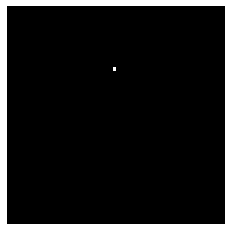

In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [18]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()
    
    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

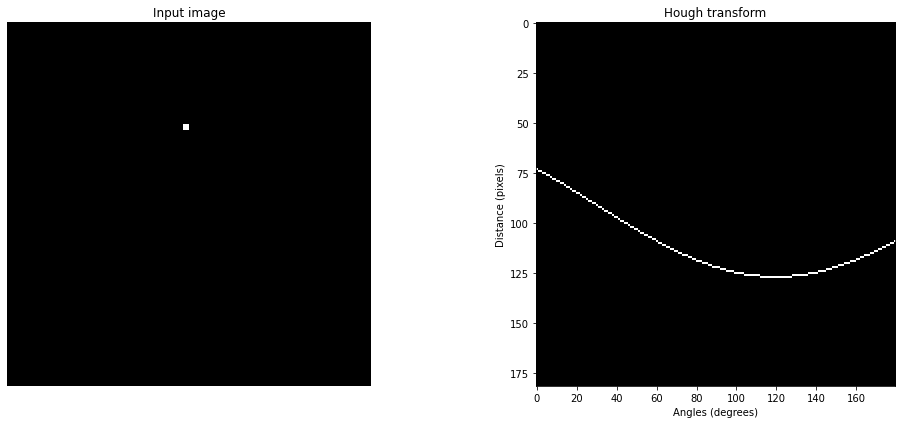

In [19]:
h, theta, ro = hough_line(im)
show_hough(h, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

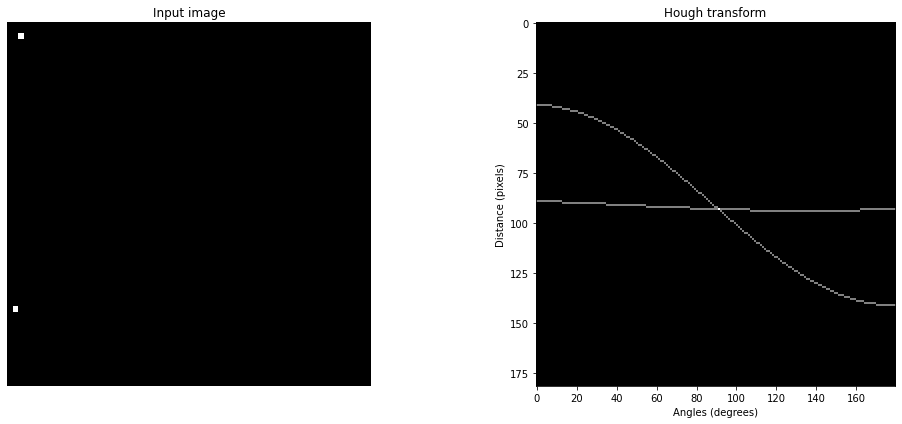

In [20]:
im = np.zeros((64,64), dtype=np.uint8)

im[2, 2] = 1
im[50,1] = 1

h, theta, ro = hough_line(im)
show_hough(h, im)

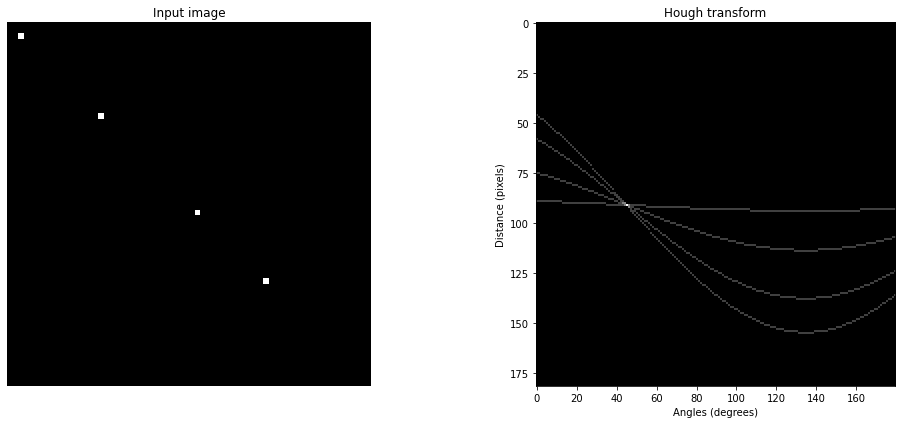

In [21]:
im = np.zeros((64,64), dtype=np.uint8)

im[2, 2] = 1
im[16,16] = 1
im[33, 33] = 1
im[45, 45] = 1
h, theta, ro = hough_line(im)
show_hough(h, im)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

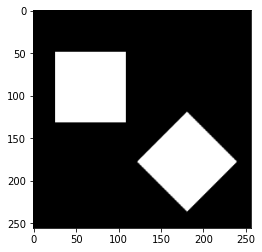

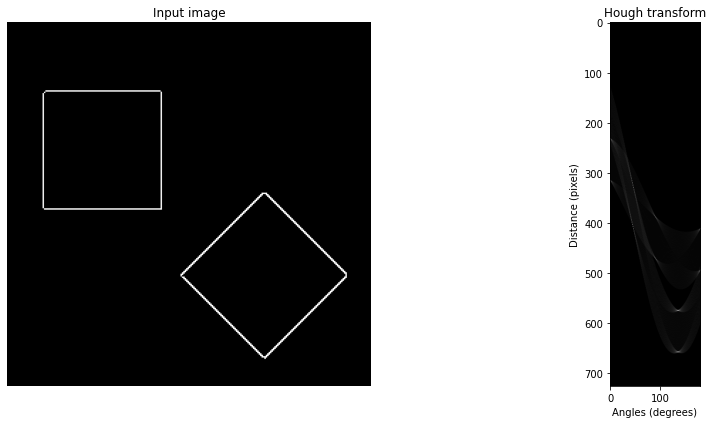

In [22]:
I_kwadrat = cv2.imread('kwadraty.png')
I_kwadrat = cv2.cvtColor(I_kwadrat, cv2.COLOR_BGR2GRAY)
plt.imshow(I_kwadrat, 'gray')
I_kwadrat_canny = cv2.Canny(I_kwadrat, 10, 20, None, 3, 1)
h_kw, th_kw, ro_kw = hough_line(I_kwadrat_canny)

show_hough(h_kw, I_kwadrat_canny)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [23]:
h, angle, dist = hough_line_peaks(h_kw, th_kw, ro_kw)
print(h, angle, dist)

[93 87 81 78 77 76 74 63] [-0.78101046  1.57079633  1.57079633 -0.79856126  0.78101046 -0.0087754
  0.0087754   0.79856126] [-37.55172414 131.68137931  48.56689655  40.55586207 212.79310345
 107.64827586  26.53655172 294.9062069 ]


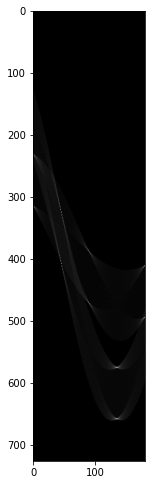

In [24]:
fig,ax = plt.subplots(1)
fig.set_size_inches(2,40)
ax.set_aspect('equal')
ax.imshow(h_kw, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

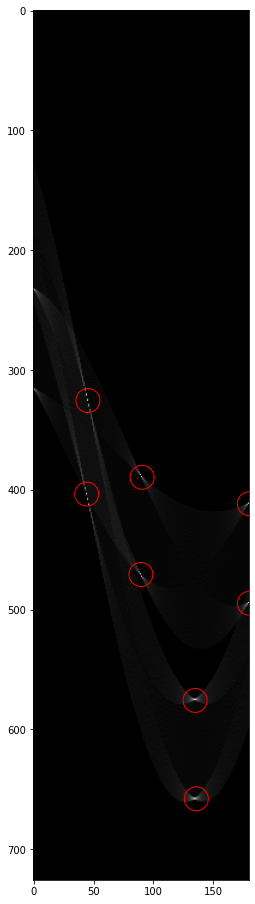

In [25]:
angle = (angle*(180/np.pi))
angle += 90
dist += 363
circles = []
for i in range(len(angle)):
    circles.append(plt.Circle((angle[i], dist[i]), 10, color='r', fill=False))

fig,ax = plt.subplots(1, figsize=(20,16))
ax.set_aspect('equal')
ax.imshow(h_kw, 'gray') # gdzie H jest przestrzenią Hougha
for j in range(len(circles)):
    ax.add_patch(circles[j])


7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

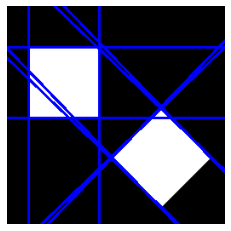

In [26]:
kwadraty = cv2.imread('kwadraty.png')
edges = cv2.Canny(kwadraty, 70, 140, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi/180,65)

for line in lines:
  rho,theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a)) 
  cv2.line(kwadraty,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(kwadraty, 'gray')
plt.axis('off')
plt.show() 

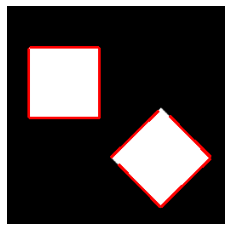

In [27]:
kwadraty = cv2.imread('kwadraty.png')
edges = cv2.Canny(kwadraty,70,150)
lines_P = cv2.HoughLinesP(edges,1,np.pi/180,50,50,10)
for line in lines_P:
    x1,y1,x2,y2 = line[0]
    cv2.line(kwadraty,(x1,y1),(x2,y2),(255,0,0),2)

plt.imshow(kwadraty, 'gray')
plt.axis('off')
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

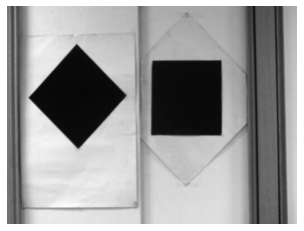

In [28]:
lab112_img = cv2.imread("lab112.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(lab112_img, 'gray')
plt.axis('off')
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

Text(0.5, 1.0, 'Linie narysowane według krawędzi')

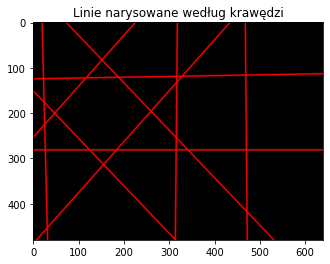

In [29]:
lab112_img_gray = cv2.imread('lab112.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(lab112_img_gray,'gray')

# przycianmy koncowke obrazu, zalezy nam na kwadratach
lab112_img_gray[:,475:]=0

def binarize(img,thr):
  for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
      if img[i][j] < thr:
        img[i][j] = 0
      else:
        img[i][j] = 1
  return img

lab112_binarized = binarize(lab112_img_gray,60)

def crossing(LoG, thr):
  X,Y = np.shape(LoG)
  result = np.zeros((X,Y))
  for i in range(0,X-2):
    for j in range(0,Y-2):
      extract = LoG[i:i+3,j:j+3]
      max = extract.max()
      min = extract.min()
      if np.sign(max) != np.sign(min):
        if LoG[i][j] >0:
          result[i][j]= LoG[i][j]+np.abs(min)
        else:
          result[i][j]= np.abs(LoG[i][j])+ max

  result_norm=cv2.normalize(result,None,0,255,cv2.NORM_MINMAX)
  for i in range(X):
    for j in range(Y):
      if result_norm[i][j] < thr:
        result_norm[i][j] = 0
      else:
        result_norm[i][j] = 1*255 
          
  final_result = cv2.medianBlur(result_norm.astype('uint8'),3)
  return final_result

edges = cv2.Canny(crossing(lab112_binarized,50),60,150,apertureSize = 3)

h, theta, rho = hough_line(edges)
h2, theta2, rho2 = hough_line_peaks(h, theta, rho)
lab112_colored = cv2.cvtColor(lab112_img_gray, cv2.COLOR_GRAY2BGR)

for i in range(0,len(theta2)):
  rho = rho2[i]
  theta = theta2[i]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))

  cv2.line(lab112_colored, (x1, y1), (x2, y2), (255,0,0), 2, cv2.LINE_AA)

plt.imshow(lab112_colored)
plt.title('Linie narysowane według krawędzi')

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

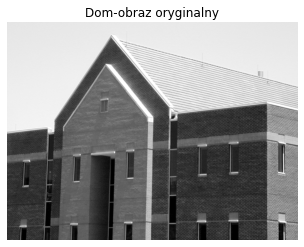

In [30]:
dom_coloured = cv2.imread('dom.png')
dom_gray = cv2.imread('dom.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(dom_gray,'gray')
plt.title('Dom-obraz oryginalny')
plt.axis('off')
plt.show()

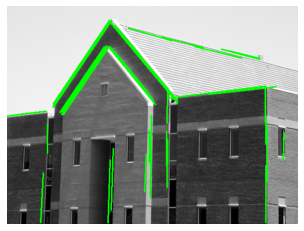

In [31]:
dom_blurred = cv2.GaussianBlur(dom_gray,(7,7),2)
dom_laplasian_blurred = cv2.Laplacian(dom_blurred,cv2.CV_32F)
house_cross = crossing(dom_laplasian_blurred, 40)

dom_canny = cv2.Canny(house_cross,10,30,None,3,1)
lines = cv2.HoughLinesP(dom_canny,1,np.pi/180,40, minLineLength=50, maxLineGap=7)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(dom_coloured,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.imshow(dom_coloured,'gray')
plt.axis('off')
plt.show()